# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

## Context

![img](../data/diamonds.jpg)

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

In this lab we will first explore our dataset to better understand the data we have and then try to determine which characteristics of a diamond are more likely to influence its price.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them in the following week.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [34]:
diamonds = pd.read_csv("../data/diamonds.csv", index_col = 0)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# 1. Taking the first look on the data.
Let's see how the data looks like by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [35]:
diamonds.head(10)
diamonds.sample(5)
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


**What do you see? Do some comments about the values you see in each column, comparing with the codebook. Is that what you expected?**

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice on our infrastracture.

**Check the shape of the data**

In [16]:
diamonds.shape #attribute of class dataframe (method would need ())

(53940, 10)

The `clarity` column is confusing because we are not diamonds experts, so we will create a new column with a new scale better understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [36]:
clarity_unique_lst = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
clarity_dict = {key: value for key, value in zip(clarity_unique_lst, range(len(clarity_unique_lst)))}
clarity_dict

{'I1': 0,
 'SI2': 1,
 'SI1': 2,
 'VS2': 3,
 'VS1': 4,
 'VVS2': 5,
 'VVS1': 6,
 'IF': 7}

In [31]:
clarity_dict_fast = dict(zip(clarity_unique_lst, range(len(clarity_unique_lst))))
clarity_dict_fast

{'I1': 0,
 'SI2': 1,
 'SI1': 2,
 'VS2': 3,
 'VS1': 4,
 'VVS2': 5,
 'VVS1': 6,
 'IF': 7}

In [37]:
#Replace 
diamonds["clarity"].replace(clarity_dict_fast, inplace = True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,1,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,3,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,1,63.3,58.0,335,4.34,4.35,2.75


In [38]:
#diamonds.replace({"clarity": clarity_dict_fast}, inplace = True)

It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [11]:
#your code here

With the `info` method, we can see the features of the dataset, the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment what you see**

In [13]:
#your code here

**Check the types of each column and comment if it matches with the expected**

In [15]:
#your code here

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics and take further steps, if needed.

**Use the `describe` method and comment what you see**

In [39]:
diamonds.describe()

,carat,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [47]:
diamonds_filtered = diamonds.query("x  == 0 or y == 0 or z == 0").copy() #find rows with value 0 in x, y or z

In [48]:
diamonds_filtered 

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,1,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,0,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,1,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,1,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,0,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,1,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,3,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,3,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,4,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,1,59.4,61.0,12631,8.49,8.45,0.0


In [49]:
# all z values are 0

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [50]:
#we have the depth formula which relates the variables, so we can change the 0 values if not all 3 variables are 0
calculate_z = diamonds.apply

In [51]:
def calculate_z (row):
    return row.depth * (row.x + row.y)/(2*100) #isolating z from depth function, specifying columns being accesed

diamonds_filtered["z"] = diamonds_filtered.apply(calculate_z, axis = 1)
diamonds_filtered.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,1,59.1,59.0,3142,6.55,6.48,3.850365
2315,1.01,Premium,H,0,58.1,59.0,3167,6.66,6.60,3.852030
4792,1.10,Premium,G,1,63.0,59.0,3696,6.50,6.47,4.085550
5472,1.01,Premium,F,1,59.2,58.0,3837,6.50,6.47,3.839120
10168,1.50,Good,G,0,64.0,61.0,4731,7.15,7.04,4.540800


**Apply it just to the rows with wrong values**

**Replace the zero values in the `z` column for a NaN**

In [52]:
diamonds.update(diamonds_filtered) #update information, adding the previous table

In [59]:
diamonds_x0 = diamonds.query("x == 0")
diamonds_x0

,carat,cut,color,clarity,depth,table,price,x,y,z
11183,1.07,Ideal,F,1.0,61.6,56.0,4954.0,0.0,6.62,2.03896
11964,1.00,Very Good,H,3.0,63.3,53.0,5139.0,0.0,0.00,0.00000
15952,1.14,Fair,G,4.0,57.5,67.0,6381.0,0.0,0.00,0.00000
24521,1.56,Ideal,G,3.0,62.2,54.0,12800.0,0.0,0.00,0.00000
26244,1.20,Premium,D,6.0,62.1,59.0,15686.0,0.0,0.00,0.00000
27430,2.25,Premium,H,1.0,62.8,59.0,18034.0,0.0,0.00,0.00000
49557,0.71,Good,F,1.0,64.1,60.0,2130.0,0.0,0.00,0.00000
49558,0.71,Good,F,1.0,64.1,60.0,2130.0,0.0,0.00,0.00000


In [66]:
cols = ["x", "y", "z"]
diamonds[cols] = diamonds[cols].replace(0, np.NaN)

In [67]:
diamonds.dropna(inplace=True)
diamonds.isna().sum()
diamonds.shape

(53932, 10)

----
# Bonus: let's check the new z values
Since with data we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [26]:
#your code here

Let's check the data again with the `describe()` method.

In [1]:
#your code here

**Check how many outliers do you have and comment what you would do with those values**

In [29]:
#your code here

# 3. Checking the outliers
Now we're going to revisit the summary table and check for outliers.

**Use the `describe` method again and comment the statistics, after that look if you have any outlier** 

In [69]:
diamonds.describe()

,carat,clarity,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,3.051101,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540265
std,0.473986,1.647109,1.432514,2.234064,3988.734835,1.119670,1.140343,0.702667
min,0.200000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [75]:
quantile76 = diamonds.y.quantile(0.90)
#quantile76.query("y > quantile76") #query only for things in the dataframe
diamonds.loc[diamonds.y > 10]

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,Premium,H,1.0,58.9,57.0,12210.0,8.09,58.90,8.06
25999,4.01,Premium,I,0.0,61.0,61.0,15223.0,10.14,10.10,6.17
27416,5.01,Fair,J,0.0,65.5,59.0,18018.0,10.74,10.54,6.98
27631,4.50,Fair,J,0.0,65.8,58.0,18531.0,10.23,10.16,6.72
49190,0.51,Ideal,E,4.0,61.8,55.0,2075.0,5.15,31.80,5.12


We're going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

**Use a box plot to check for the outliers**

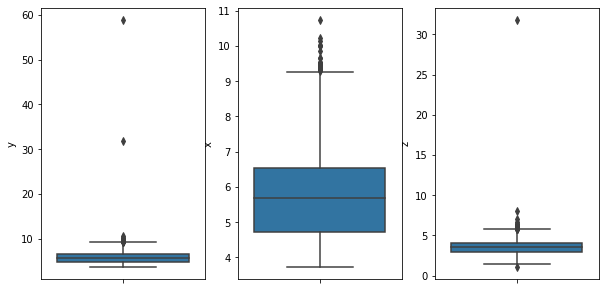

In [87]:
fig, ax = plt.subplots(1,3, figsize = (10, 5)) #columns and rows, number of axes, figure size 
sns.boxplot(y = diamonds.y, ax = ax[0]) #selecting y and axes where to draw
sns.boxplot(y = diamonds.x, ax = ax[1])
sns.boxplot(y = diamonds.z, ax = ax[2])

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we now that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [90]:
diamonds.loc[(diamonds.y > 10) & (diamonds.z) > 6]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [96]:
diamonds.loc[diamonds.z > 10]

,carat,cut,color,clarity,depth,table,price,x,y,z
48411,0.51,Very Good,E,4.0,61.8,54.7,1970.0,5.12,5.15,31.8


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` to the row with the outlier**

In [101]:
#diamonds.loc[diamonds.y > 11]
rows_to_drop = diamonds.loc[(diamonds.y > 11) | (diamonds.z > 11)].copy()
#rows_to_drop
diamonds.drop(rows_to_drop.index)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,1.0,61.5,55.0,326.0,3.95,3.98,2.43
2,0.21,Premium,E,2.0,59.8,61.0,326.0,3.89,3.84,2.31
3,0.23,Good,E,4.0,56.9,65.0,327.0,4.05,4.07,2.31
4,0.29,Premium,I,3.0,62.4,58.0,334.0,4.20,4.23,2.63
5,0.31,Good,J,1.0,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,2.0,60.8,57.0,2757.0,5.75,5.76,3.50
53937,0.72,Good,D,2.0,63.1,55.0,2757.0,5.69,5.75,3.61
53938,0.70,Very Good,D,2.0,62.8,60.0,2757.0,5.66,5.68,3.56
53939,0.86,Premium,H,1.0,61.0,58.0,2757.0,6.15,6.12,3.74


Let's check if we actually corrected the outlier.

In [ ]:
# your code here

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [43]:
#your code here

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [48]:
#your code here

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [50]:
#your code here

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

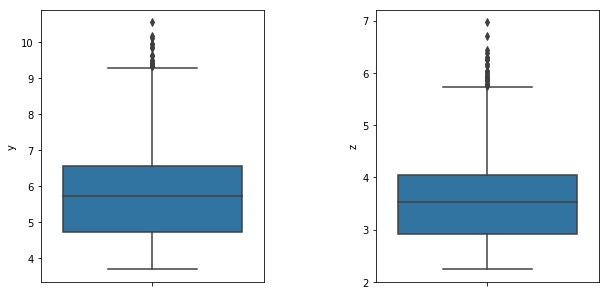

In [60]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think?**


In [102]:
#your thoughts here

**Once you are happy with your cleaning, save the cleaned data and continue to another notebook to have a more organized way of working. Your new csv will be named ``diamonds_clean``**

In [62]:
#your code here

In [63]:
#Solution
diamonds.to_csv("../data/diamonds_clean.csv")